# Data Anaylysis With Python Fyp CMS

In [4]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Hamxa\Desktop\csvsss\pacakagerates2.csv')
df

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS
...,...,...,...,...,...,...,...,...
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS


In [5]:
df.head(10)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS
5,6,18.0,Islamabd,Punjab,Chakwal,Punjab,54,BOOK/COpy
6,7,20.0,Islamabd,Punjab,Multan,Punjab,80,OTHER_PHYSICAL_INSTRUMENTS
7,8,21.0,Islamabd,Punjab,Multan,Punjab,63,BOOK/COpy
8,9,22.0,Faislabad,Punjab,Rawalpindi,Punjab,66,BOOK/COpy
9,10,23.0,Faislabad,Punjab,Karachi,Sindh,92,OTHER_PHYSICAL_INSTRUMENTS


In [6]:
df.tail(10)

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
507,508,8.0,Rawalpindi,Punjab,Sukhhar,Sindh,32,OTHER_PHYSICAL_INSTRUMENTS
508,509,9.0,Rawalpindi,Punjab,Naushro feroz,Sindh,36,OTHER_PHYSICAL_INSTRUMENTS
509,510,10.0,Sialkot,Punjab,Naushro feroz,Sindh,40,OTHER_PHYSICAL_INSTRUMENTS
510,511,11.0,Chamman,Balochistan,Naushro feroz,Sindh,44,OTHER_PHYSICAL_INSTRUMENTS
511,512,12.0,Chamman,Balochistan,Naushro feroz,Sindh,48,OTHER_PHYSICAL_INSTRUMENTS
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS
516,517,123.0,Bagh,AJK,Malir,Sindh,492,OTHER_PHYSICAL_INSTRUMENTS


# Graph to show from which District/city More packages went

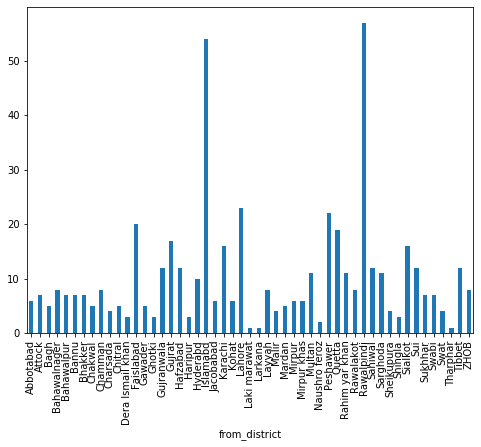

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=(8,6)

df.groupby('from_district')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

# Below The list of counting of total number of sent pacakages city/District

In [8]:
df['from_district'].count()

517

In [9]:
rwp= df.from_district.value_counts()['Rawalpindi']
print(rwp)

57


In [10]:
isl= df.from_district.value_counts()['Islamabd']
print(isl)

54


In [11]:
lhr= df.from_district.value_counts()['Lahore']
print(lhr)

23


In [12]:
kri= df.from_district.value_counts()['Karachi']
print(kri)

16


# Graph to show Destination District/city 

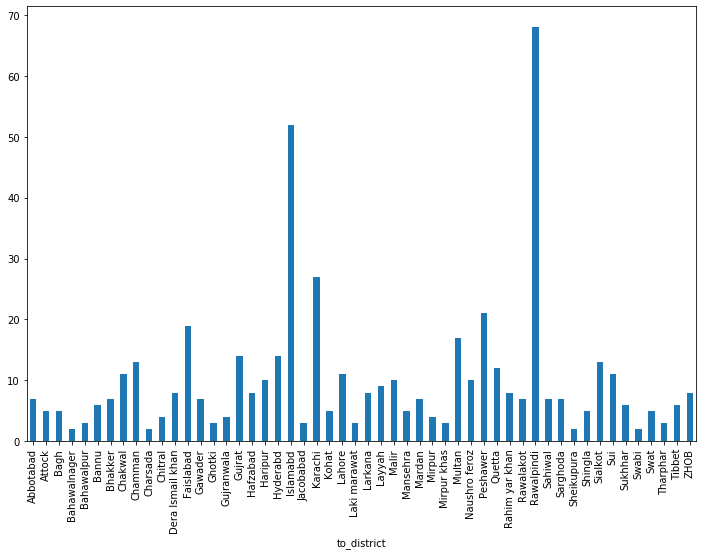

In [13]:
plt.rcParams['figure.figsize']=(12,8)

df.groupby('to_district')['id'].nunique().plot(kind='bar')
plt.show()

# Below The list of counting of total number of receive pacakages city/District

In [14]:
rwp= df.to_district.value_counts()['Rawalpindi']
print(rwp)

68


In [15]:
isl= df.to_district.value_counts()['Islamabd']
print(isl)

52


In [16]:
lhr= df.to_district.value_counts()['Lahore']
print(lhr)

11


In [17]:
kri= df.to_district.value_counts()['Karachi']
print(kri)

27


In [18]:
mul=df.to_district.value_counts()['Multan']
print(mul)

17


# Graph to show from which Province wise More packages went

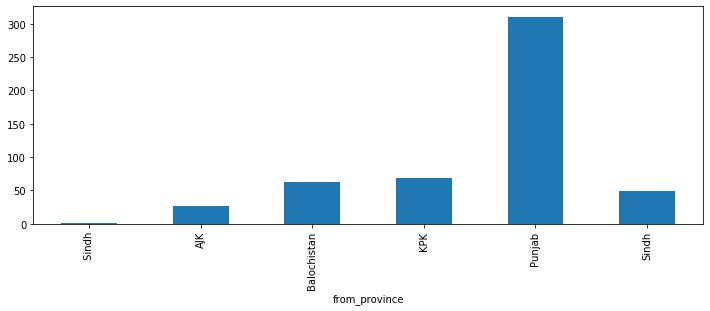

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=(12,4)

df.groupby('from_province')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

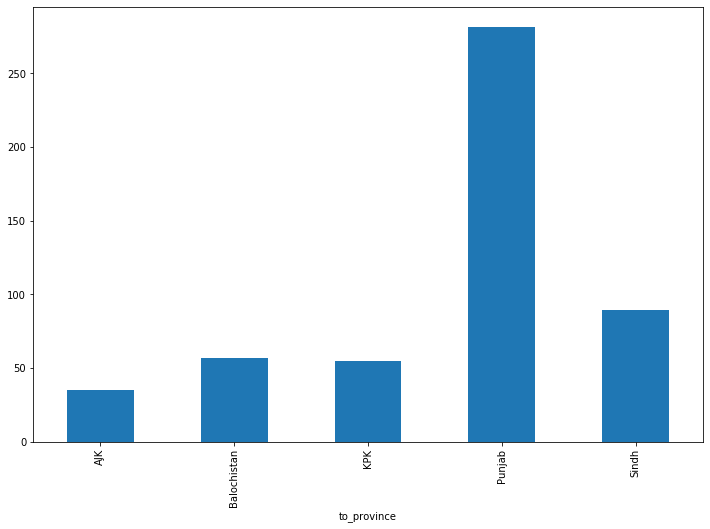

In [20]:

plt.rcParams['figure.figsize']=(12,8)

df.groupby('to_province')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

In [21]:
Ajk= df.to_province.value_counts()['AJK']
Ajk

35

In [22]:
Punjab=df.to_province.value_counts()['Punjab']
Punjab

281

In [23]:
Sindh=df.to_province.value_counts()['Sindh']
Sindh

89

In [24]:
Kpk=df.to_province.value_counts()['KPK']
Kpk

55

In [25]:
Baloch=df.to_province.value_counts()['Balochistan']
Baloch

57

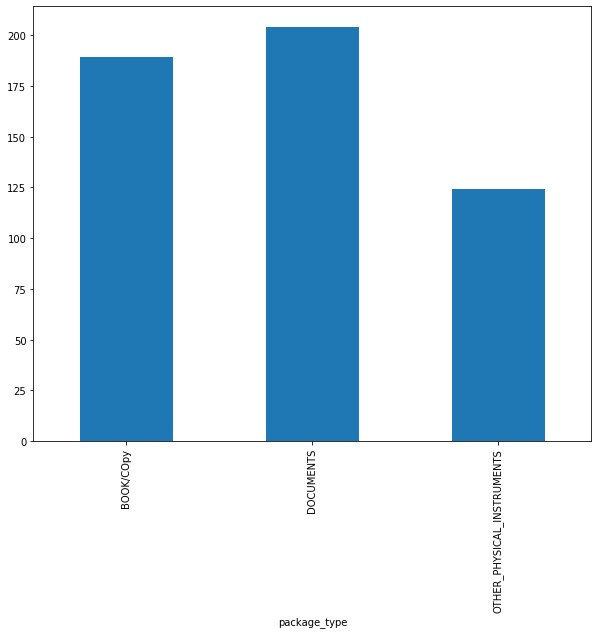

In [26]:

plt.rcParams['figure.figsize']=(10,8)

df.groupby('package_type')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

In [27]:
df

,id,price_in_gram,from_district,from_province,to_district,to_province,weight_in_gram,package_type
0,1,5.0,Karachi,Sindh,Rawalpindi,Punjab,10,DOCUMENTS
1,2,8.0,Rawalpindi,Punjab,Islamabd,Punjab,24,BOOK/COpy
2,3,8.0,Islamabd,Punjab,Rawalpindi,Punjab,16,DOCUMENTS
3,4,12.0,Rawalpindi,Punjab,Peshawer,KPK,20,BOOK/COpy
4,5,15.0,Islamabd,Punjab,Chakwal,Punjab,60,OTHER_PHYSICAL_INSTRUMENTS
...,...,...,...,...,...,...,...,...
512,513,119.0,Sheikupura,Punjab,Naushro feroz,Sindh,476,OTHER_PHYSICAL_INSTRUMENTS
513,514,120.0,Haripur,KPK,Naushro feroz,Sindh,480,OTHER_PHYSICAL_INSTRUMENTS
514,515,121.0,Haripur,KPK,Malir,Sindh,484,OTHER_PHYSICAL_INSTRUMENTS
515,516,122.0,Rawalakot,AJK,Malir,Sindh,488,OTHER_PHYSICAL_INSTRUMENTS


In [28]:
import pymysql
import pandas as pd
connection= pymysql.connect(host='localhost',
                                    port=3308,
                                   user='cms',
                                   passwd='01161811024',
                                   database='cms')
query= "select * from cms.location_franchise"

                        

In [29]:
result= pd.read_sql_query(query, connection)
result.to_csv('fran.csv', index=False)


In [30]:
df1= pd.read_csv('fran.csv')
df1

,id,name,province,city,register_num,num_of_employes,office_starting_timing,office_closing_timing,email,location_id,owner_id
0,1,korangi,Sindh,Karachi,1200,19,2020-03-15 08:00:00,2020-03-15 06:00:00,korangicms@gmail.com,1,1
1,2,Tench,Punjab,Rawalpindi,1201,12,2020-03-15 08:00:00,2020-03-15 06:00:00,tenchcms@gmail.com,2,1
2,3,Quetta Fort,Balochistan,Quetta,1202,19,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanfortcms@gmail.com,13,1
3,4,Quetta Pishin,Balochistan,Quetta,1203,11,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanpishincms@gmail.com,14,1
4,5,Sadder,Punjab,Rawalpindi,1208,11,2020-03-15 08:00:00,2020-03-15 06:00:00,saddercms@gmail.com,180,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,bagan,kpk,Abbotabad,1609,11,2020-03-15 08:00:00,2020-03-15 06:00:00,bagan_cms@gmail.com,129,1
141,142,Bagnotar,kpk,Abbotabad,1611,18,2020-03-15 08:00:00,2020-03-15 06:00:00,bagnotar_cms@gmail.com,130,1
142,143,Biran Gali,kpk,Abbotabad,1614,11,2020-03-15 08:00:00,2020-03-15 06:00:00,birangali_cms@gmail.com,131,1
143,144,Gpo Road Lahore,Punjab,Lahore,1619,19,2020-03-15 08:00:00,2020-03-15 06:00:00,lhr_gporoad_cms@gmail.com,132,1


In [31]:
df1.head(10)

,id,name,province,city,register_num,num_of_employes,office_starting_timing,office_closing_timing,email,location_id,owner_id
0,1,korangi,Sindh,Karachi,1200,19,2020-03-15 08:00:00,2020-03-15 06:00:00,korangicms@gmail.com,1,1
1,2,Tench,Punjab,Rawalpindi,1201,12,2020-03-15 08:00:00,2020-03-15 06:00:00,tenchcms@gmail.com,2,1
2,3,Quetta Fort,Balochistan,Quetta,1202,19,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanfortcms@gmail.com,13,1
3,4,Quetta Pishin,Balochistan,Quetta,1203,11,2020-03-15 08:00:00,2020-03-15 06:00:00,balochistanpishincms@gmail.com,14,1
4,5,Sadder,Punjab,Rawalpindi,1208,11,2020-03-15 08:00:00,2020-03-15 06:00:00,saddercms@gmail.com,180,1
5,6,Six road,Punjab,Rawalpindi,1209,16,2020-03-15 08:00:00,2020-03-15 06:00:00,sixroadcms@gmail.com,179,1
6,7,Qasim Market,Punjab,Rawalpindi,1211,22,2020-03-15 08:00:00,2020-03-15 06:00:00,qasimmarket2cms@gmail.com,178,1
7,8,Tehli Mohri chowk,Punjab,Rawalpindi,1212,20,2020-03-15 08:00:00,2020-03-15 06:00:00,tehlimohricms@gmail.com,177,1
8,9,Chakri Road,Punjab,Rawalpindi,1214,24,2020-03-15 08:00:00,2020-03-15 06:00:00,chakriroadcms@gmail.com,176,1
9,10,Lalazar,Punjab,Rawalpindi,1215,19,2020-03-15 08:00:00,2020-03-15 06:00:00,lalazarcms@gmail.com,175,1


# To see which city has more franchise

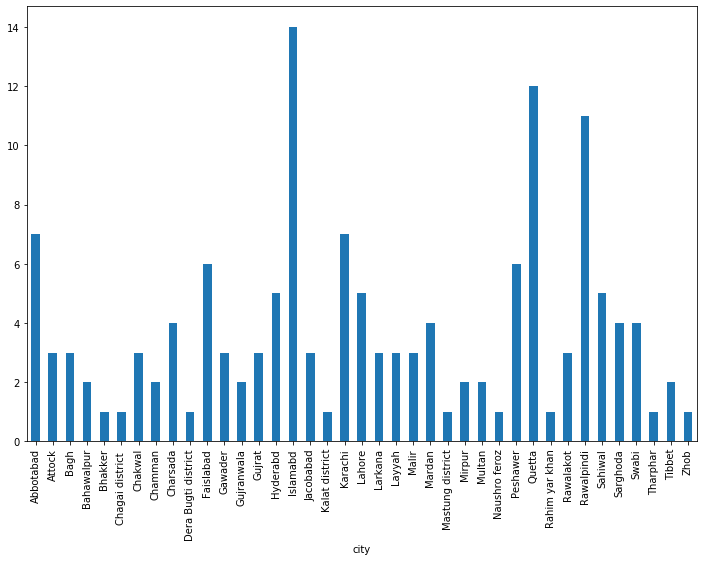

In [32]:

plt.rcParams['figure.figsize']=(12,8)

df1.groupby('city')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

# To see by numbering

In [35]:
isl= df1.city.value_counts()['Islamabd']
print(isl)

14


In [36]:
rwp= df.city.value_counts()['Rawalpindi']
print(rwp)

AttributeError: 'DataFrame' object has no attribute 'city'

In [38]:
que= df1.city.value_counts()['Quetta']
print(que)

12


# To see which Province has more franchises

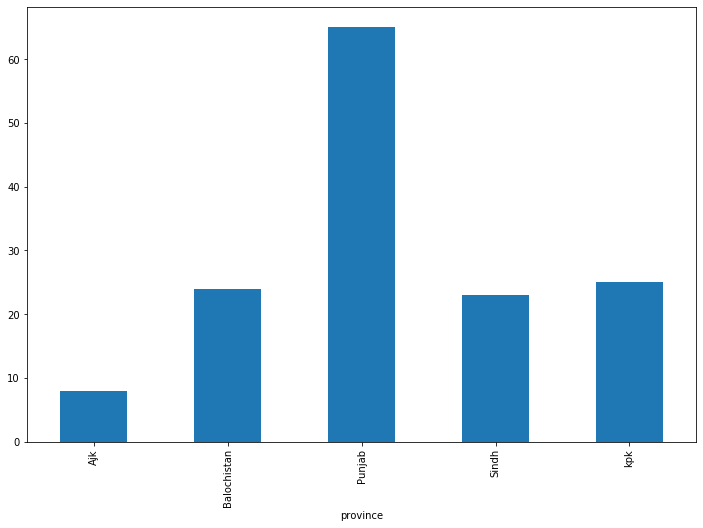

In [40]:

plt.rcParams['figure.figsize']=(12,8)

df1.groupby('province')['id'].nunique().plot(kind='bar')

figsize=(28,5)
plt.show()

# to see by numbering

In [ ]:
Baloch=df1.province.value_counts()['Balochistan']
Baloch

In [ ]:
punjab=df.province.value_counts()['Punjab']
punjab

In [ ]:
sindh=df.province.value_counts()['Sindh']
sindh

In [ ]:
Ajk=df.province.value_counts()['Ajk']
Ajk

In [ ]:
sindh=df.province.value_counts()['Sindh']
sindh

In [ ]:
kpk=df.province.value_counts()['kpk']
kpk

In [ ]:
df

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X=df.drop(columns=['from_district',
'to_district','id','from_province','to_province',
'package_type'])
X


In [ ]:
l=df['package_type']
l

In [ ]:
model=DecisionTreeClassifier()
model.fit(X,Y)
predictions=model.predict([[3,8]])
predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(columns=['from_district','to_district','id',
'to_province','from_province','package_type'])
Y=df['package_type']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)  
predictions=model.predict(X_test)
score=accuracy_score(Y_test, predictions)
score

(0, 546.4136232371483)

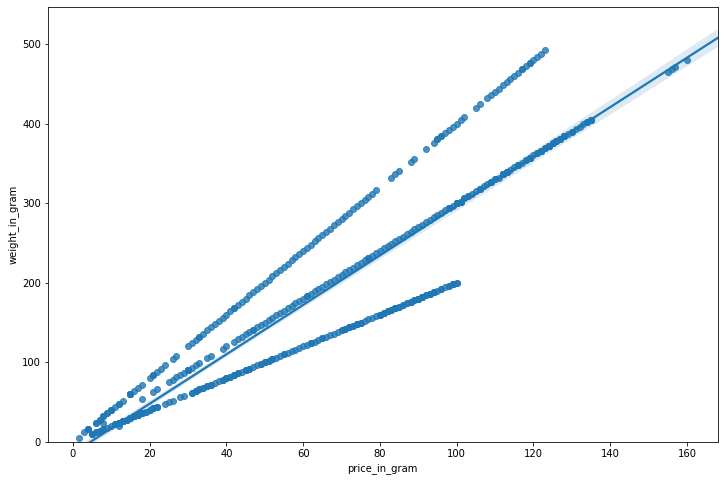

In [43]:
import seaborn as sns
sns.regplot(x='price_in_gram', y='weight_in_gram', data= df)
plt.ylim(0,)
